# Model comparison after Federated Learning

In [1]:
import sys
sys.path.insert(0, "../")

In [10]:
import json
import pandas as pd
from matplotlib import pyplot as plt

from mlxtend.plotting import plot_decision_regions

from decentralized_smart_grid_ml.federated_learning.models_reader_writer \
    import load_fl_model, load_fl_model_weights

In [19]:
plt.style.use('seaborn')

In [3]:
task_config_path = "../data_sample/simple_ml_task/simple_ml_task_config.json"
with open(task_config_path, "r") as file_read:
    json_config = json.load(file_read)

In [11]:
N_PARTICIPANTS = 2
task_name = json_config["task_name"]

model_path = json_config["baseline_model_artifact"]
final_model_weights = "../data_sample/simple_ml_task/validator/validator_weights_final.json"
features_names = json_config["features_names"]
participants_directory = "../data_sample/" + task_name + "/participants/participant_" 
test_set_path = "../data_sample/simple_ml_task/validator/" + task_name + "_test.csv"

Load the participants' datasets and concatenate them to obtain a single dataset

In [12]:
participants_datasets = []
for i in range(N_PARTICIPANTS):
    participants_datasets.append(
        pd.read_csv(
            participants_directory + str(i) + "/" + task_name + "_" + str(i) + ".csv"
        )
    )
whole_participants_df = pd.concat(participants_datasets)

In [13]:
x_train = whole_participants_df[features_names["features"]].values
y_train = whole_participants_df[features_names["labels"]].values

Load the test set used to compute the metrics

In [14]:
test_set_df = pd.read_csv(test_set_path)
x_test = test_set_df[features_names["features"]].values
y_test = test_set_df[features_names["labels"]].values

Load and train the original model with the participants' datasets

In [22]:
model = load_fl_model(model_path)
model.fit(x_train, y_train, epochs=json_config["epochs"]*json_config["fl_rounds"])

2021-10-26 17:39:22,791 - decentralized_smart_grid_ml.federated_learning.models_reader_writer - INFO - Load model from  /home/fabsam/Documenti/university/masterDegree/thesis/Decentralized-SmartGrid-ML/data_sample/simple_ml_task/linear_model
Epoch 1/4
13/13 [==============================] - 0s 1ms/step - loss: 0.2467 - accuracy: 0.5850
Epoch 2/4
13/13 [==============================] - 0s 1ms/step - loss: 0.2357 - accuracy: 0.6975
Epoch 3/4
13/13 [==============================] - 0s 1ms/step - loss: 0.2249 - accuracy: 0.8750
Epoch 4/4
13/13 [==============================] - 0s 2ms/step - loss: 0.2203 - accuracy: 0.6950


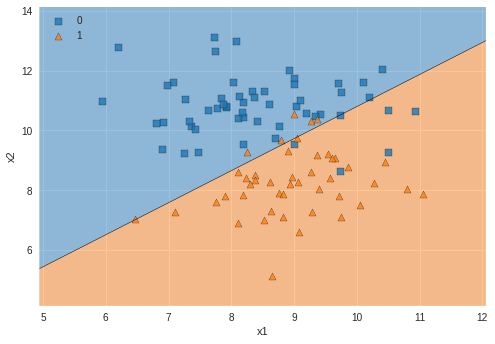

In [23]:
plot_decision_regions(x_test, y_test, clf=model, legend=2)
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

Load the global model obtained with the federated learning approach

In [24]:
fl_model = load_fl_model(model_path)
final_weights = load_fl_model_weights(final_model_weights)
fl_model.set_weights(final_weights)
fl_model.evaluate(x_test, y_test)

2021-10-26 17:39:31,962 - decentralized_smart_grid_ml.federated_learning.models_reader_writer - INFO - Load model from  /home/fabsam/Documenti/university/masterDegree/thesis/Decentralized-SmartGrid-ML/data_sample/simple_ml_task/linear_model
2021-10-26 17:39:31,963 - decentralized_smart_grid_ml.federated_learning.models_reader_writer - INFO - Loaded model's weights from ../data_sample/simple_ml_task/validator/validator_weights_final.json
4/4 [==============================] - 0s 1ms/step - loss: 0.2295 - accuracy: 0.8800


[0.22951039671897888, 0.8799999952316284]

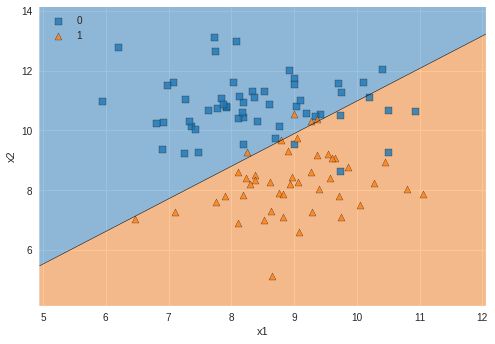

In [25]:
plot_decision_regions(x_test, y_test, clf=fl_model, legend=2)
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

Compare the results

In [26]:
print("Model trained with the participants' dataset: ", model.evaluate(x_test, y_test))
print("Global model trained with the FL approach: ", fl_model.evaluate(x_test, y_test))

4/4 [==============================] - 0s 1ms/step - loss: 0.2139 - accuracy: 0.8900
Model trained with the participants' dataset:  [0.21392694115638733, 0.8899999856948853]
4/4 [==============================] - 0s 2ms/step - loss: 0.2295 - accuracy: 0.8800
Global model trained with the FL approach:  [0.22951039671897888, 0.8799999952316284]
